<a href="https://colab.research.google.com/github/hazradeepmoy/Image-generation-using-variational-autoencoder/blob/main/VAE_and_Faces_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'lfw-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F26922%2F34595%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20241001%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20241001T092025Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D8a742c0c3a120146fd9cf03b6d75e29f6b8a4d435ad1ce3fbc9bd85557c4e3d412873460366615871d44a2a0f2b6f2a4b370d13bc37df4fbe2d0c6410f933572ba894c77fc44bc86cb12fb5f5f9ebc5353feba97637f223f37575ff1d7af2647db3d0c2e92af6af6bcf6c5aa5c8b3a7397a40a4cdf482fd11200351dbe411479447845fcb8c45bcdea45ed3dc96304d50fb0a449bd096dba27fc61a676c352eb3c01b323ca10db4c24d2080e2f41b960c34771411ca42b28f7e113d5e997495941a63307ce64453b2f719650a5e2de4a6a262a7d908ed57f80e19cc74dac9fa463e733680a5ee207eb7e3b899157a853cdf36db5cd2ed94b20685a7a2f574b28,lfw-attributes:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F484252%2F903715%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20241001%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20241001T092025Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D9142da7245137689ad10855bfafdcdc63c920faf80d02cbc46eecd6009478d377a380d3991033c73e9047f4b1b5b2dae767337641a9b208f5fed5f9c4037ff125ffabd0d814471c497094e7209279831f0060f7490ecf97cf1b9356c8f086a289fbe2281d6e17284f293038a39ac4756e4d5acc214d985ad666b4b1283eda0b592ac4094b699932c322ae623425e77d6522a2cfa2572e41cf48ffb08b0301b54c17fe4400c8d5e9bfff30f8fe9080e81c6105fad2a69043812fc167d9d8c6cbdf574d353a968c2884cc7a7386423e75e24236a71624d83be5c05fcd71c29ea23bfadf9fc29e6084797ee536a263fc1938b72db87998c31edc406121a89b9462f'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


# Fun with Variational Autoencoders

This is a starter kernel to use **Labelled Faces in the Wild (LFW) Dataset** in order to maintain knowledge about main Autoencoder principles. PyTorch will be used for modelling.


### **Fork it and give it an upvote.**




![architecture](https://miro.medium.com/max/3636/1*LSYNW5m3TN7xRX61BZhoZA.png)

Useful links:


* [Building Autoencoders in Keras](https://blog.keras.io/building-autoencoders-in-keras.html)
* [Conditional VAE (Russian)](https://habr.com/ru/post/331664/)
* [Tutorial on Variational Autoencoders](https://arxiv.org/abs/1606.05908)
* [Introducing Variational Autoencoders (in Prose and Code)](https://blog.fastforwardlabs.com/2016/08/12/introducing-variational-autoencoders-in-prose-and.html)
* [How Autoencoders work - Understanding the math and implementation (Notebook)](https://www.kaggle.com/shivamb/how-autoencoders-work-intro-and-usecases)
* [Tutorial - What is a variational autoencoder?](https://jaan.io/what-is-variational-autoencoder-vae-tutorial/)



# A bit of theory

"Autoencoding" is a data compression algorithm where the compression and decompression functions are 1) data-specific, 2) lossy, and 3) learned automatically from examples rather than engineered by a human. Additionally, in almost all contexts where the term "autoencoder" is used, the compression and decompression functions are implemented with neural networks.

1) Autoencoders are data-specific, which means that they will only be able to compress data similar to what they have been trained on. This is different from, say, the MPEG-2 Audio Layer III (MP3) compression algorithm, which only holds assumptions about "sound" in general, but not about specific types of sounds. An autoencoder trained on pictures of faces would do a rather poor job of compressing pictures of trees, because the features it would learn would be face-specific.

2) Autoencoders are lossy, which means that the decompressed outputs will be degraded compared to the original inputs (similar to MP3 or JPEG compression). This differs from lossless arithmetic compression.

3) Autoencoders are learned automatically from data examples, which is a useful property: it means that it is easy to train specialized instances of the algorithm that will perform well on a specific type of input. It doesn't require any new engineering, just appropriate training data.

source: https://blog.keras.io/building-autoencoders-in-keras.html


In [ ]:
import matplotlib.pyplot as plt
import os
import glob
import pandas as pd
import random
import numpy as np
import cv2
import base64
import imageio
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data_utils
from copy import deepcopy
from torch.autograd import Variable
from tqdm import tqdm
from pprint import pprint
from PIL import Image
from sklearn.model_selection import train_test_split
import os

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print('Training on',DEVICE)

Training on cuda


In [ ]:
DATASET_PATH ="/kaggle/input/lfw-dataset/lfw-deepfunneled/lfw-deepfunneled/"
ATTRIBUTES_PATH = "/kaggle/input/lfw-attributes/lfw_attributes.txt"

# Explore the data

In [ ]:
dataset = []
for path in glob.iglob(os.path.join(DATASET_PATH, "**", "*.jpg")):
    person = path.split("/")[-2]
    dataset.append({"person":person, "path": path})

dataset = pd.DataFrame(dataset)
#too much Bush
dataset = dataset.groupby("person").filter(lambda x: len(x) < 25 )
dataset.head(10)

person                                               path
0  Tyler_Hamilton  /kaggle/input/lfw-dataset/lfw-deepfunneled/lfw...
1  Tyler_Hamilton  /kaggle/input/lfw-dataset/lfw-deepfunneled/lfw...
2  Bernard_Siegel  /kaggle/input/lfw-dataset/lfw-deepfunneled/lfw...
3   Blythe_Danner  /kaggle/input/lfw-dataset/lfw-deepfunneled/lfw...
4   Blythe_Danner  /kaggle/input/lfw-dataset/lfw-deepfunneled/lfw...
5   Gene_Robinson  /kaggle/input/lfw-dataset/lfw-deepfunneled/lfw...
6   Gene_Robinson  /kaggle/input/lfw-dataset/lfw-deepfunneled/lfw...
7   Gene_Robinson  /kaggle/input/lfw-dataset/lfw-deepfunneled/lfw...
8   Gene_Robinson  /kaggle/input/lfw-dataset/lfw-deepfunneled/lfw...
9   Gene_Robinson  /kaggle/input/lfw-dataset/lfw-deepfunneled/lfw...

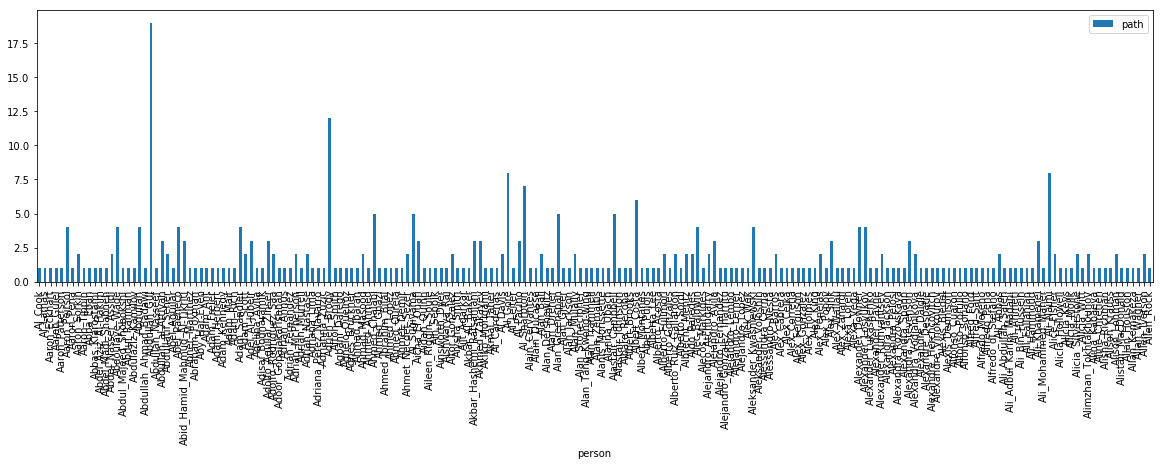

In [ ]:
dataset.groupby("person").count()[:200].plot(kind='bar', figsize=(20,5))

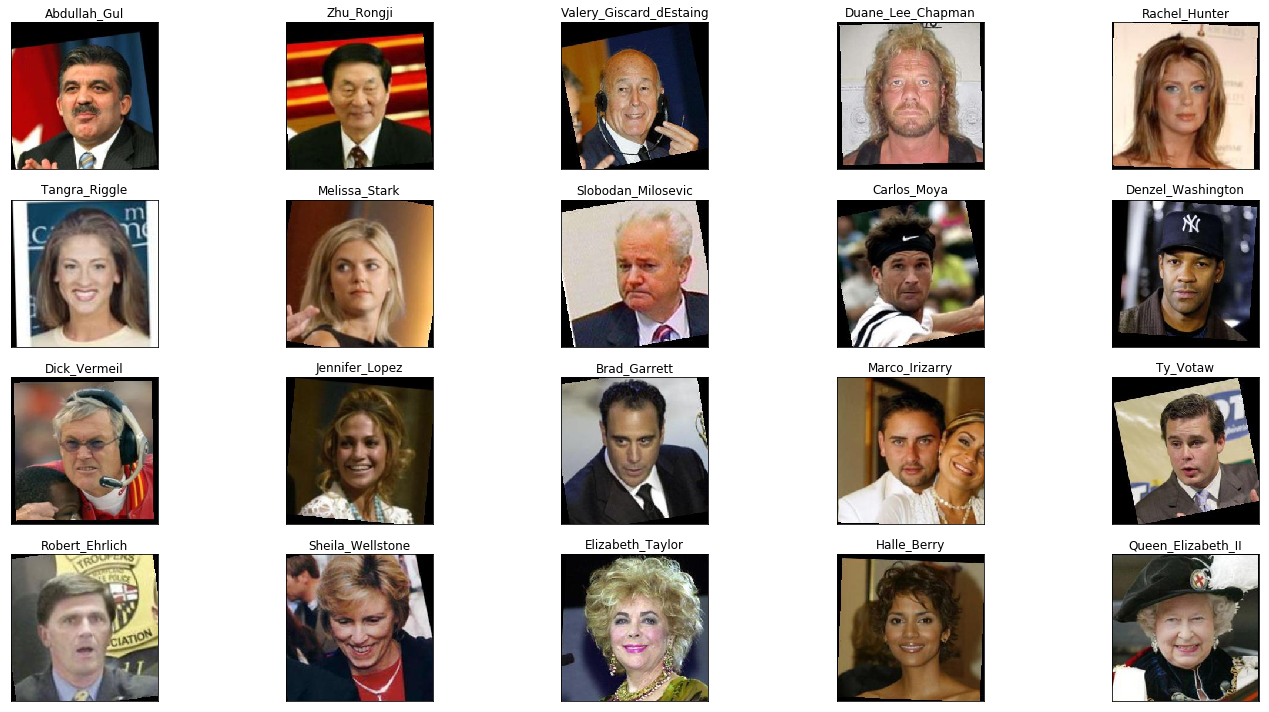

In [ ]:
plt.figure(figsize=(20,10))
for i in range(20):
    idx = random.randint(0, len(dataset))
    img = plt.imread(dataset.path.iloc[idx])
    plt.subplot(4, 5, i+1)
    plt.imshow(img)
    plt.title(dataset.person.iloc[idx])
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

# Prepare the dataset

In [ ]:
def fetch_dataset(dx=80,dy=80, dimx=45,dimy=45):

    df_attrs = pd.read_csv(ATTRIBUTES_PATH, sep='\t', skiprows=1,)
    df_attrs = pd.DataFrame(df_attrs.iloc[:,:-1].values, columns = df_attrs.columns[1:])

    photo_ids = []
    for dirpath, dirnames, filenames in os.walk(DATASET_PATH):
        for fname in filenames:
            if fname.endswith(".jpg"):
                fpath = os.path.join(dirpath,fname)
                photo_id = fname[:-4].replace('_',' ').split()
                person_id = ' '.join(photo_id[:-1])
                photo_number = int(photo_id[-1])
                photo_ids.append({'person':person_id,'imagenum':photo_number,'photo_path':fpath})

    photo_ids = pd.DataFrame(photo_ids)
    df = pd.merge(df_attrs,photo_ids,on=('person','imagenum'))

    assert len(df)==len(df_attrs),"lost some data when merging dataframes"

    all_photos = df['photo_path'].apply(imageio.imread)\
                                .apply(lambda img:img[dy:-dy,dx:-dx])\
                                .apply(lambda img: np.array(Image.fromarray(img).resize([dimx,dimy])) )

    all_photos = np.stack(all_photos.values).astype('uint8')
    all_attrs = df.drop(["photo_path","person","imagenum"],axis=1)

    return all_photos,all_attrs

In [ ]:
data, attrs = fetch_dataset()

In [ ]:
#45,45
IMAGE_H = data.shape[1]
IMAGE_W = data.shape[2]

N_CHANNELS = 3

In [ ]:
data = np.array(data / 255, dtype='float32')
X_train, X_val = train_test_split(data, test_size=0.2, random_state=42)

In [ ]:
X_train = torch.FloatTensor(X_train)
X_val = torch.FloatTensor(X_val)

# Building simple autoencoder

In [ ]:
dim_z=100

In [ ]:
X_train.shape

torch.Size([10514, 45, 45, 3])

In [ ]:
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(45*45*3,1500),
            nn.BatchNorm1d(1500),
            nn.ReLU(),
            nn.Linear(1500,1000),
            nn.BatchNorm1d(1000),
            nn.ReLU(),
            nn.Linear(1000, dim_z),
            nn.BatchNorm1d(dim_z),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(dim_z,1000),
            nn.BatchNorm1d(1000),
            nn.ReLU(),
            #nn.Linear(500,1000),
            #nn.ReLU(),
            nn.Linear(1000,1500),
            nn.BatchNorm1d(1500),
            nn.ReLU(),
            nn.Linear(1500,45*45*3)
        )

    def encode(self,x):
        return self.encoder(x)

    def decode(self,z):
        return self.decoder(z)

    def forward(self, x):
        encoded = self.encode(x)
        decoded = self.decode(encoded)


        return encoded, decoded

In [ ]:
class Autoencoder_cnn(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(in_channels=16, out_channels=8, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(in_channels=8, out_channels=16, kernel_size=5, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(in_channels=16, out_channels=3, kernel_size=5, stride=2),
            #nn.ReLU(),
            #nn.ConvTranspose2d(in_channels=8, out_channels=8, kernel_size=3, stride=2),
            #nn.ReLU(),
            #nn.ConvTranspose2d(in_channels=8, out_channels=3, kernel_size=5, stride=2)
        )

    def decode(self,z):
        return self.decoder(z)

    def forward(self, x):
        x = x.permute(0,3,1,2)
        encoded = self.encoder(x)
        decoded = self.decode(encoded)


        return encoded, decoded

In [ ]:
model_auto = Autoencoder().to(DEVICE)

# Train autoencoder

In [ ]:
def get_batch(data, batch_size=64):
    total_len = data.shape[0]
    for i in range(0, total_len, batch_size):
        yield data[i:min(i+batch_size,total_len)]

def plot_gallery(images, h, w, n_row=3, n_col=6, with_title=False, titles=[]):
    plt.figure(figsize=(1.5 * n_col, 1.7 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        try:
            plt.imshow(images[i].reshape((h, w, 3)), cmap=plt.cm.gray, vmin=-1, vmax=1, interpolation='nearest')
            if with_title:
                plt.title(titles[i])
            plt.xticks(())
            plt.yticks(())
        except:
            pass

def fit_epoch(model, train_x, criterion, optimizer, batch_size, is_cnn=False):
    running_loss = 0.0
    processed_data = 0

    for inputs in get_batch(train_x,batch_size):

        if not is_cnn:
            inputs = inputs.view(-1, 45*45*3)
        inputs = inputs.to(DEVICE)

        optimizer.zero_grad()

        encoder, decoder = model(inputs)

        #print('decoder shape: ', decoder.shape)

        if not is_cnn:
            outputs = decoder.view(-1, 45*45*3)
        else:
            outputs = decoder.permute(0,2,3,1)

        loss = criterion(outputs,inputs)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.shape[0]
        processed_data += inputs.shape[0]

    train_loss = running_loss / processed_data
    return train_loss

def eval_epoch(model, x_val, criterion, is_cnn=False):
    running_loss = 0.0
    processed_data = 0
    model.eval()

    for inputs in get_batch(x_val):
        if not is_cnn:
            inputs = inputs.view(-1, 45*45*3)
        inputs = inputs.to(DEVICE)

        with torch.set_grad_enabled(False):
            encoder, decoder = model(inputs)

            if not is_cnn:
                outputs = decoder.view(-1, 45*45*3)
            else:
                outputs = decoder.permute(0,2,3,1)

            loss = criterion(outputs,inputs)
            running_loss += loss.item() * inputs.shape[0]
            processed_data += inputs.shape[0]

    val_loss = running_loss / processed_data

    #draw
    with torch.set_grad_enabled(False):
        pic = x_val[3]

        if not is_cnn:
            pic_input = pic.view(-1, 45*45*3)
        else:
            pic_input = torch.FloatTensor(pic.unsqueeze(0))

        pic_input = pic_input.to(DEVICE)
        encoder, decoder = model(pic_input)

        if not is_cnn:
            pic_output = decoder.view(-1, 45*45*3).squeeze()
        else:
            pic_output = decoder.permute(0,2,3,1)

        pic_output = pic_output.to("cpu")
        pic_input = pic_input.to("cpu")
        plot_gallery([pic_input, pic_output],45,45,1,2)

    return val_loss

def train(train_x, val_x, model, epochs=10, batch_size=32, is_cnn=False):
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    history = []
    log_template = "\nEpoch {ep:03d} train_loss: {t_loss:0.4f} val_loss: {val_loss:0.4f}"

    with tqdm(desc="epoch", total=epochs) as pbar_outer:
        for epoch in range(epochs):
            train_loss = fit_epoch(model,train_x,criterion,optimizer,batch_size,is_cnn)
            val_loss = eval_epoch(model,val_x,criterion, is_cnn)
            print("loss: ", train_loss)

            history.append((train_loss,val_loss))

            pbar_outer.update(1)
            tqdm.write(log_template.format(ep=epoch+1, t_loss=train_loss, val_loss=val_loss))

    return history

epoch:   2%|▏         | 1/50 [00:02<02:14,  2.74s/it]

loss:  0.03005551631281261

Epoch 001 train_loss: 0.0301 val_loss: 0.0161


epoch:   4%|▍         | 2/50 [00:04<02:02,  2.55s/it]

loss:  0.013152798527555137

Epoch 002 train_loss: 0.0132 val_loss: 0.0120


epoch:   6%|▌         | 3/50 [00:06<01:53,  2.42s/it]

loss:  0.011366358697584471

Epoch 003 train_loss: 0.0114 val_loss: 0.0109


epoch:   8%|▊         | 4/50 [00:09<01:46,  2.32s/it]

loss:  0.010181688304812662

Epoch 004 train_loss: 0.0102 val_loss: 0.0097


epoch:  10%|█         | 5/50 [00:11<01:41,  2.26s/it]

loss:  0.009572946301925222

Epoch 005 train_loss: 0.0096 val_loss: 0.0091


epoch:  12%|█▏        | 6/50 [00:13<01:37,  2.21s/it]

loss:  0.008793687045401281

Epoch 006 train_loss: 0.0088 val_loss: 0.0088


epoch:  14%|█▍        | 7/50 [00:15<01:33,  2.18s/it]

loss:  0.008475358129084105

Epoch 007 train_loss: 0.0085 val_loss: 0.0083


epoch:  16%|█▌        | 8/50 [00:17<01:30,  2.16s/it]

loss:  0.008182486748460675

Epoch 008 train_loss: 0.0082 val_loss: 0.0082


epoch:  18%|█▊        | 9/50 [00:19<01:28,  2.15s/it]

loss:  0.007944564323621471

Epoch 009 train_loss: 0.0079 val_loss: 0.0080


epoch:  20%|██        | 10/50 [00:21<01:25,  2.14s/it]

loss:  0.007670699979717347

Epoch 010 train_loss: 0.0077 val_loss: 0.0080


epoch:  22%|██▏       | 11/50 [00:23<01:23,  2.13s/it]

loss:  0.007651780650483092

Epoch 011 train_loss: 0.0077 val_loss: 0.0077


epoch:  24%|██▍       | 12/50 [00:25<01:20,  2.13s/it]

loss:  0.007367043633797713

Epoch 012 train_loss: 0.0074 val_loss: 0.0079


epoch:  26%|██▌       | 13/50 [00:28<01:18,  2.13s/it]

loss:  0.007158812974569534

Epoch 013 train_loss: 0.0072 val_loss: 0.0074


epoch:  28%|██▊       | 14/50 [00:30<01:16,  2.13s/it]

loss:  0.006952250763435191

Epoch 014 train_loss: 0.0070 val_loss: 0.0075


epoch:  30%|███       | 15/50 [00:32<01:14,  2.13s/it]

loss:  0.006870226613540874

Epoch 015 train_loss: 0.0069 val_loss: 0.0072


epoch:  32%|███▏      | 16/50 [00:34<01:12,  2.13s/it]

loss:  0.006583567009574422

Epoch 016 train_loss: 0.0066 val_loss: 0.0068


epoch:  34%|███▍      | 17/50 [00:36<01:10,  2.13s/it]

loss:  0.0065693027188050805

Epoch 017 train_loss: 0.0066 val_loss: 0.0073


epoch:  36%|███▌      | 18/50 [00:38<01:08,  2.13s/it]

loss:  0.00645761123860341

Epoch 018 train_loss: 0.0065 val_loss: 0.0070


epoch:  38%|███▊      | 19/50 [00:40<01:06,  2.13s/it]

loss:  0.006287591528506737

Epoch 019 train_loss: 0.0063 val_loss: 0.0068


epoch:  40%|████      | 20/50 [00:43<01:03,  2.13s/it]

loss:  0.006137929236633636

Epoch 020 train_loss: 0.0061 val_loss: 0.0065


/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
epoch:  42%|████▏     | 21/50 [00:45<01:01,  2.13s/it]

loss:  0.006074079604872919

Epoch 021 train_loss: 0.0061 val_loss: 0.0067


epoch:  44%|████▍     | 22/50 [00:47<01:00,  2.16s/it]

loss:  0.006133223947761901

Epoch 022 train_loss: 0.0061 val_loss: 0.0067


epoch:  46%|████▌     | 23/50 [00:49<00:58,  2.16s/it]

loss:  0.006032613119358841

Epoch 023 train_loss: 0.0060 val_loss: 0.0067


epoch:  48%|████▊     | 24/50 [00:51<00:55,  2.15s/it]

loss:  0.00594719686730208

Epoch 024 train_loss: 0.0059 val_loss: 0.0066


epoch:  50%|█████     | 25/50 [00:53<00:53,  2.15s/it]

loss:  0.005946076828692323

Epoch 025 train_loss: 0.0059 val_loss: 0.0069


epoch:  52%|█████▏    | 26/50 [00:55<00:51,  2.15s/it]

loss:  0.0059005879887037965

Epoch 026 train_loss: 0.0059 val_loss: 0.0070


epoch:  54%|█████▍    | 27/50 [00:58<00:49,  2.15s/it]

loss:  0.00578169012335936

Epoch 027 train_loss: 0.0058 val_loss: 0.0067


epoch:  56%|█████▌    | 28/50 [01:00<00:47,  2.15s/it]

loss:  0.005623726444490734

Epoch 028 train_loss: 0.0056 val_loss: 0.0066


epoch:  58%|█████▊    | 29/50 [01:02<00:45,  2.15s/it]

loss:  0.005669493490657511

Epoch 029 train_loss: 0.0057 val_loss: 0.0071


epoch:  60%|██████    | 30/50 [01:04<00:43,  2.15s/it]

loss:  0.0056181966697569355

Epoch 030 train_loss: 0.0056 val_loss: 0.0066


epoch:  62%|██████▏   | 31/50 [01:06<00:40,  2.15s/it]

loss:  0.005571835269981069

Epoch 031 train_loss: 0.0056 val_loss: 0.0064


epoch:  64%|██████▍   | 32/50 [01:08<00:38,  2.16s/it]

loss:  0.005452359851284262

Epoch 032 train_loss: 0.0055 val_loss: 0.0065


epoch:  66%|██████▌   | 33/50 [01:11<00:36,  2.16s/it]

loss:  0.005335709124611149

Epoch 033 train_loss: 0.0053 val_loss: 0.0065


epoch:  68%|██████▊   | 34/50 [01:13<00:34,  2.16s/it]

loss:  0.005290685616173551

Epoch 034 train_loss: 0.0053 val_loss: 0.0065


epoch:  70%|███████   | 35/50 [01:15<00:32,  2.16s/it]

loss:  0.00530852441891563

Epoch 035 train_loss: 0.0053 val_loss: 0.0067


epoch:  72%|███████▏  | 36/50 [01:17<00:30,  2.16s/it]

loss:  0.005387853010454308

Epoch 036 train_loss: 0.0054 val_loss: 0.0073


epoch:  74%|███████▍  | 37/50 [01:19<00:28,  2.16s/it]

loss:  0.005337080920954136

Epoch 037 train_loss: 0.0053 val_loss: 0.0067


epoch:  76%|███████▌  | 38/50 [01:21<00:25,  2.16s/it]

loss:  0.005248405469008554

Epoch 038 train_loss: 0.0052 val_loss: 0.0067


epoch:  78%|███████▊  | 39/50 [01:23<00:23,  2.16s/it]

loss:  0.005236995957544846

Epoch 039 train_loss: 0.0052 val_loss: 0.0067


epoch:  80%|████████  | 40/50 [01:26<00:21,  2.16s/it]

loss:  0.005378032399655743

Epoch 040 train_loss: 0.0054 val_loss: 0.0074


epoch:  82%|████████▏ | 41/50 [01:28<00:19,  2.16s/it]

loss:  0.005219210030300911

Epoch 041 train_loss: 0.0052 val_loss: 0.0067


epoch:  84%|████████▍ | 42/50 [01:30<00:17,  2.16s/it]

loss:  0.005054330649568324

Epoch 042 train_loss: 0.0051 val_loss: 0.0067


epoch:  86%|████████▌ | 43/50 [01:32<00:15,  2.16s/it]

loss:  0.00508095635971402

Epoch 043 train_loss: 0.0051 val_loss: 0.0072


epoch:  88%|████████▊ | 44/50 [01:34<00:12,  2.16s/it]

loss:  0.005043119119887009

Epoch 044 train_loss: 0.0050 val_loss: 0.0070


epoch:  90%|█████████ | 45/50 [01:36<00:10,  2.15s/it]

loss:  0.0049137091151632995

Epoch 045 train_loss: 0.0049 val_loss: 0.0073


epoch:  92%|█████████▏| 46/50 [01:39<00:08,  2.16s/it]

loss:  0.004919025478135197

Epoch 046 train_loss: 0.0049 val_loss: 0.0069


epoch:  94%|█████████▍| 47/50 [01:41<00:06,  2.16s/it]

loss:  0.005069633637743972

Epoch 047 train_loss: 0.0051 val_loss: 0.0073


epoch:  96%|█████████▌| 48/50 [01:43<00:04,  2.15s/it]

loss:  0.005136184823614791

Epoch 048 train_loss: 0.0051 val_loss: 0.0074


epoch:  98%|█████████▊| 49/50 [01:45<00:02,  2.15s/it]

loss:  0.00498516743201766

Epoch 049 train_loss: 0.0050 val_loss: 0.0072


epoch: 100%|██████████| 50/50 [01:47<00:00,  2.15s/it]

loss:  0.004892660906888787

Epoch 050 train_loss: 0.0049 val_loss: 0.0075


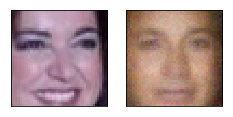

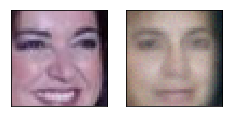

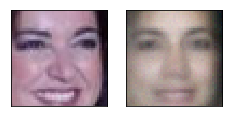

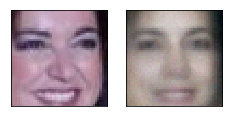

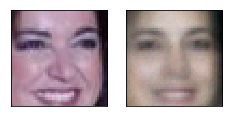

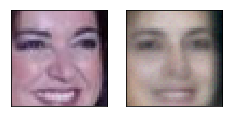

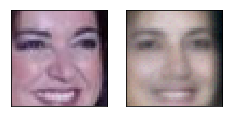

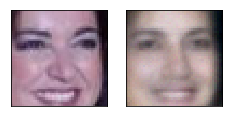

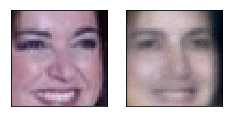

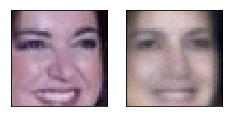

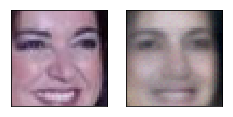

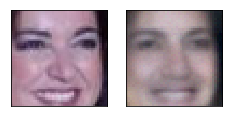

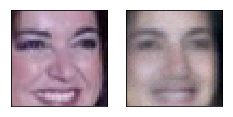

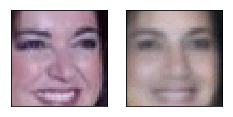

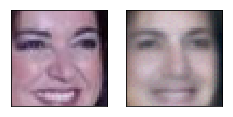

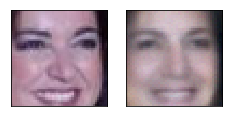

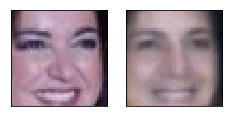

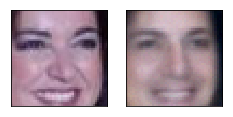

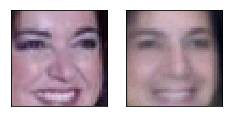

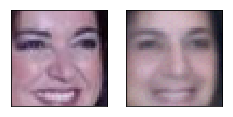

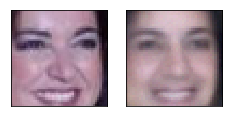

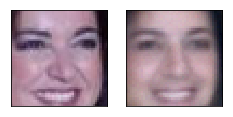

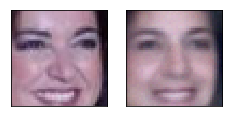

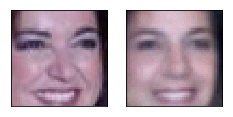

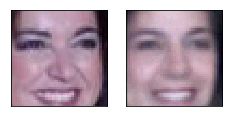

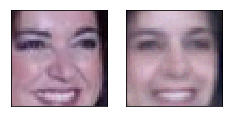

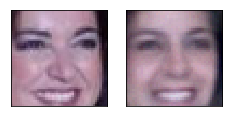

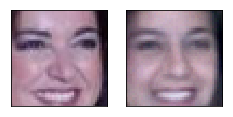

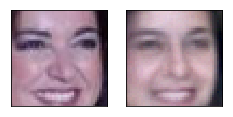

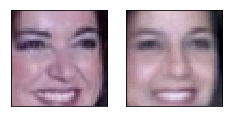

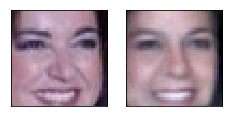

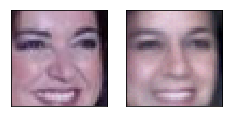

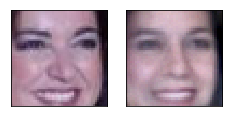

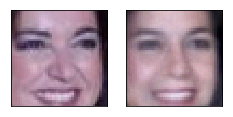

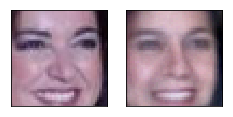

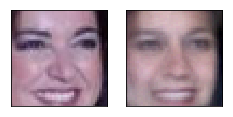

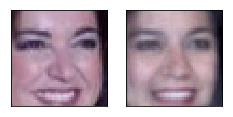

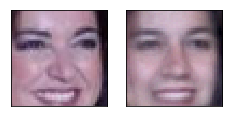

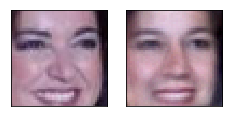

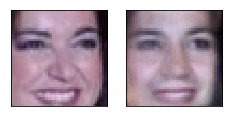

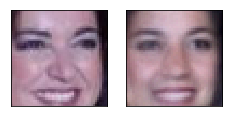

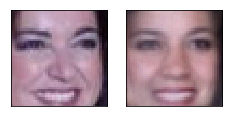

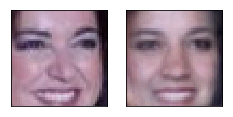

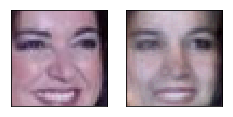

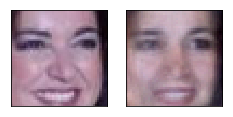

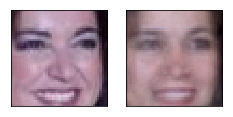

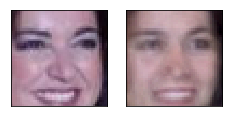

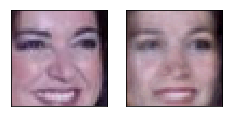

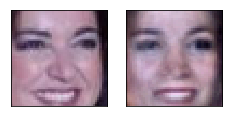

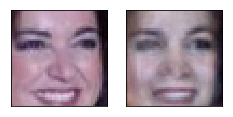

In [ ]:
history = train(X_train, X_val, model_auto, epochs=50, batch_size=64)

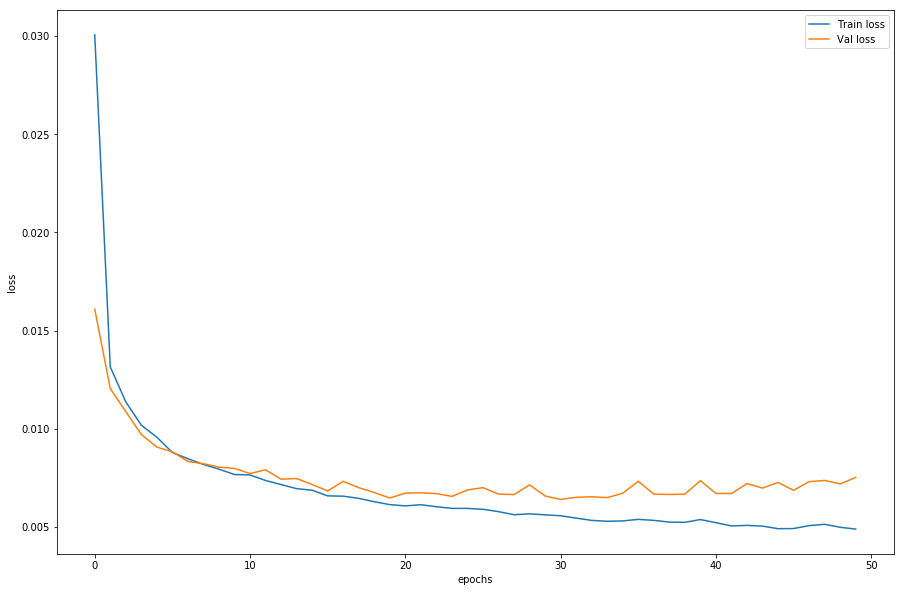

In [ ]:
train_loss, val_loss = zip(*history)
plt.figure(figsize=(15,10))
plt.plot(train_loss, label='Train loss')
plt.plot(val_loss, label='Val loss')
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot();

# Sampling

Let's generate some samples from random vectors

(25, 100)


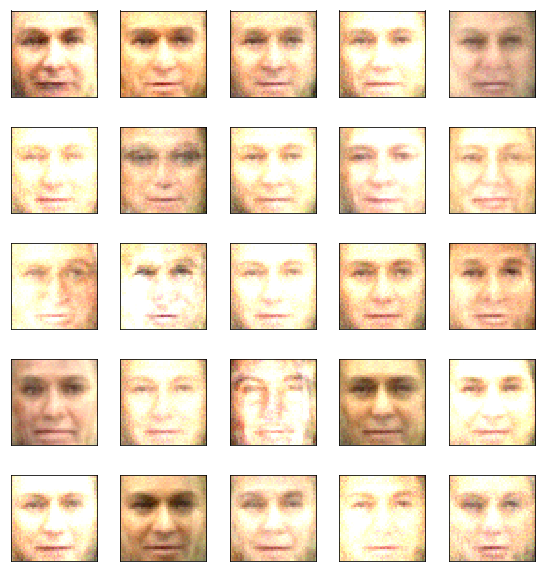

In [ ]:
z = np.random.randn(25, dim_z)
print(z.shape)

with torch.no_grad():
    inputs = torch.FloatTensor(z)
    inputs = inputs.to(DEVICE)
    model_auto.eval()
    output = model_auto.decode(inputs)
    plot_gallery(output.data.cpu().numpy(), IMAGE_H, IMAGE_W, n_row=5, n_col=5)

# Adding smile and glasses

Let's find some attributes like smiles or glasses on the photo and try to add it to the photos which don't have it. We will use the second dataset for it. It contains a bunch of such attributes.

In [ ]:
attrs.head()

Male     Asian     White     Black     Baby     Child      Youth  \
0   1.56835  -1.88904    1.7372 -0.929729  -1.4718  -0.19558  -0.835609   
1  0.169851 -0.982408  0.422709  -1.28218 -1.36006 -0.867002  -0.452293   
2  0.997749  -1.36419 -0.157377 -0.756447 -1.89183 -0.871526  -0.862893   
3   1.12272   -1.9978   1.91614  -2.51421 -2.58007  -1.40424  0.0575511   
4   1.07821   -2.0081   1.67621  -2.27806 -2.65185  -1.34841   0.649089   

   Middle Aged    Senior Black Hair  ... Pale Skin 5 o' Clock Shadow  \
0    -0.351468  -1.01253  -0.719593  ...  0.361738           1.16612   
1    -0.197521 -0.956073  -0.802107  ... -0.832036          -0.39768   
2    0.0314447  -1.34152 -0.0900375  ...   1.54974           1.88475   
3  0.000195882  -1.27351   -1.43146  ...  0.567822         -0.176089   
4    0.0176564  -1.88911   -1.85721  ...  -1.46147         -0.955283   

  Strong Nose-Mouth Lines Wearing Lipstick Flushed Face High Cheekbones  \
0                -1.16492         -1.13999     -2.37175        -1.29993   
1                 0.87416        -0.945431    -0.268649     -0.00624408   
2               -0.999765         -1.35986     -1.91211        -1.09563   
3                 1.10812         -1.60094     -3.26461        0.813418   
4                0.119113         -1.12818     -3.16105       0.0826804   

  Brown Eyes Wearing Earrings Wearing Necktie Wearing Necklace  
0  -0.414682          -1.1449        0.694007        -0.826609  
1 -0.0304057        -0.480128         0.66676        -0.496559  
2   0.915126        -0.572332        0.144262        -0.841231  
3   0.308631        -0.848693        0.475941        -0.447025  
4  -0.439614        -0.359859       -0.760774        -0.410152  

[5 rows x 73 columns]

In [ ]:
attrs.columns

Index(['Male', 'Asian', 'White', 'Black', 'Baby', 'Child', 'Youth',
       'Middle Aged', 'Senior', 'Black Hair', 'Blond Hair', 'Brown Hair',
       'Bald', 'No Eyewear', 'Eyeglasses', 'Sunglasses', 'Mustache', 'Smiling',
       'Frowning', 'Chubby', 'Blurry', 'Harsh Lighting', 'Flash',
       'Soft Lighting', 'Outdoor', 'Curly Hair', 'Wavy Hair', 'Straight Hair',
       'Receding Hairline', 'Bangs', 'Sideburns', 'Fully Visible Forehead',
       'Partially Visible Forehead', 'Obstructed Forehead', 'Bushy Eyebrows',
       'Arched Eyebrows', 'Narrow Eyes', 'Eyes Open', 'Big Nose',
       'Pointy Nose', 'Big Lips', 'Mouth Closed', 'Mouth Slightly Open',
       'Mouth Wide Open', 'Teeth Not Visible', 'No Beard', 'Goatee',
       'Round Jaw', 'Double Chin', 'Wearing Hat', 'Oval Face', 'Square Face',
       'Round Face', 'Color Photo', 'Posed Photo', 'Attractive Man',
       'Attractive Woman', 'Indian', 'Gray Hair', 'Bags Under Eyes',
       'Heavy Makeup', 'Rosy Cheeks', 'Shiny Skin', 'Pa

In [ ]:
smile_ids = attrs['Smiling'].sort_values(ascending=False).iloc[100:125].index.values
smile_data = data[smile_ids]

no_smile_ids = attrs['Smiling'].sort_values(ascending=True).head(25).index.values
no_smile_data = data[no_smile_ids]

eyeglasses_ids = attrs['Eyeglasses'].sort_values(ascending=False).head(25).index.values
eyeglasses_data = data[eyeglasses_ids]

sunglasses_ids = attrs['Sunglasses'].sort_values(ascending=False).head(25).index.values
sunglasses_data = data[sunglasses_ids]

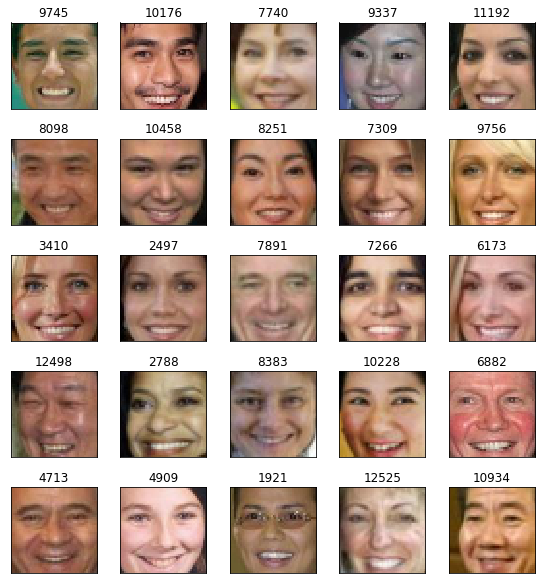

In [ ]:
plot_gallery(smile_data, IMAGE_H, IMAGE_W, n_row=5, n_col=5, with_title=True, titles=smile_ids)

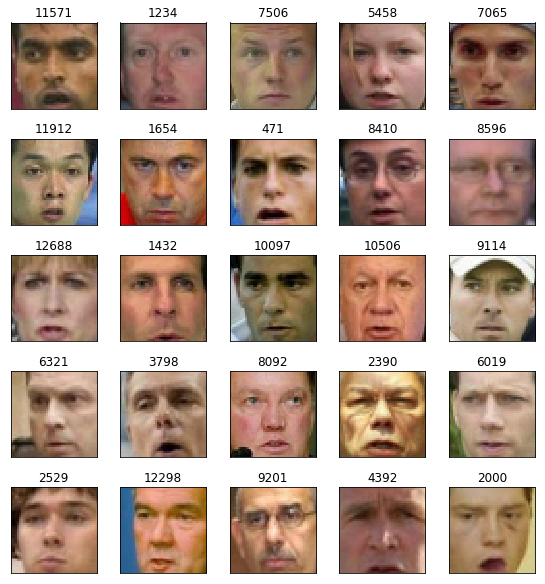

In [ ]:
plot_gallery(no_smile_data, IMAGE_H, IMAGE_W, n_row=5, n_col=5, with_title=True, titles=no_smile_ids)

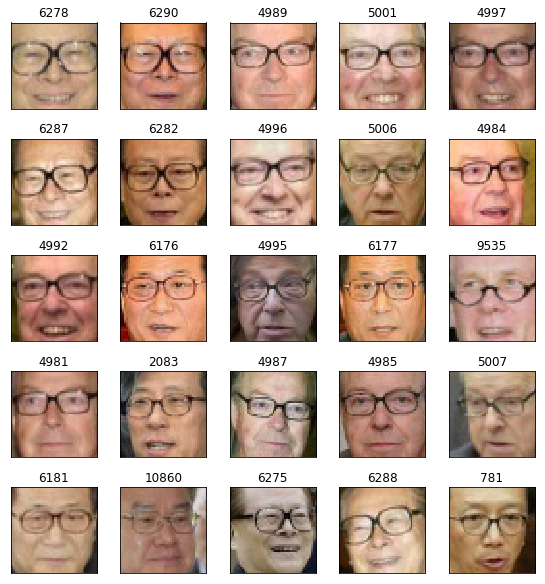

In [ ]:
plot_gallery(eyeglasses_data, IMAGE_H, IMAGE_W, n_row=5, n_col=5, with_title=True, titles=eyeglasses_ids)

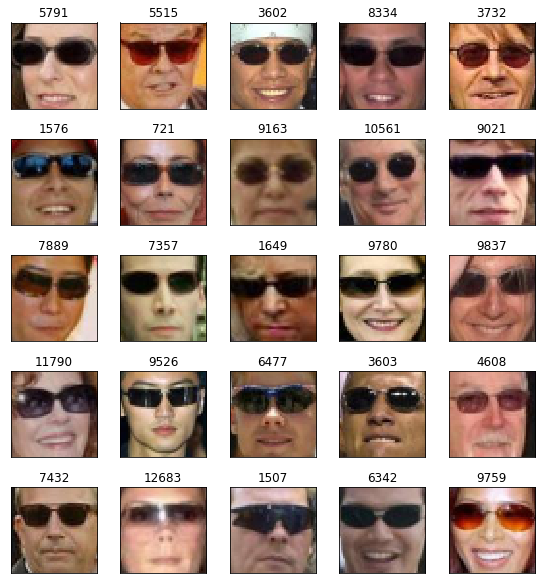

In [ ]:
plot_gallery(sunglasses_data, IMAGE_H, IMAGE_W, n_row=5, n_col=5, with_title=True, titles=sunglasses_ids)

Calculating latent space vector for the selected images.

In [ ]:
def to_latent(pic):
    with torch.no_grad():
        inputs = torch.FloatTensor(pic.reshape(-1, 45*45*3))
        inputs = inputs.to(DEVICE)
        model_auto.eval()
        output = model_auto.encode(inputs)
        return output

def from_latent(vec):
    with torch.no_grad():
        inputs = vec.to(DEVICE)
        model_auto.eval()
        output = model_auto.decode(inputs)
        return output

In [ ]:
smile_latent = to_latent(smile_data).mean(axis=0)
no_smile_latent = to_latent(no_smile_data).mean(axis=0)
sunglasses_latent = to_latent(sunglasses_data).mean(axis=0)

smile_vec = smile_latent-no_smile_latent
sunglasses_vec = sunglasses_latent - smile_latent

def make_me_smile(ids):
    for id in ids:
        pic = data[id:id+1]
        latent_vec = to_latent(pic)
        latent_vec[0] += smile_vec
        pic_output = from_latent(latent_vec)
        pic_output = pic_output.view(-1,45,45,3).cpu()
        plot_gallery([pic,pic_output], IMAGE_H, IMAGE_W, n_row=1, n_col=2)

def give_me_sunglasses(ids):
    for id in ids:
        pic = data[id:id+1]
        latent_vec = to_latent(pic)
        latent_vec[0] += sunglasses_vec
        pic_output = from_latent(latent_vec)
        pic_output = pic_output.view(-1,45,45,3).cpu()
        plot_gallery([pic,pic_output], IMAGE_H, IMAGE_W, n_row=1, n_col=2)


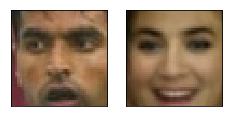

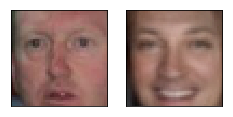

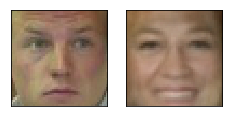

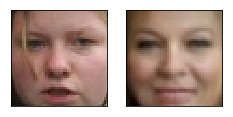

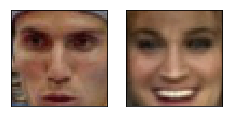

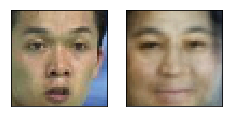

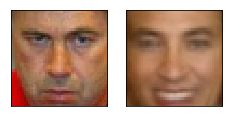

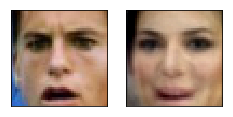

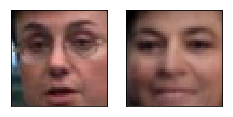

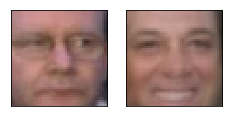

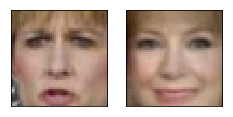

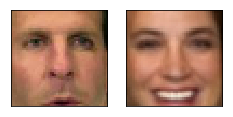

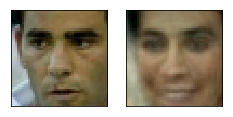

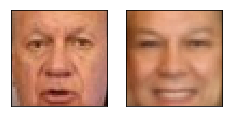

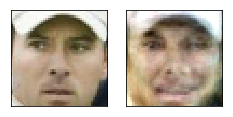

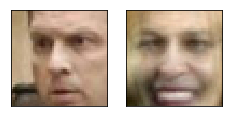

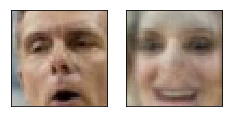

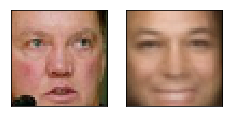

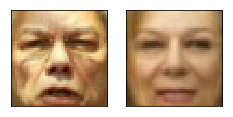

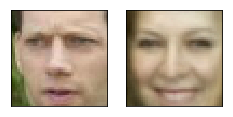

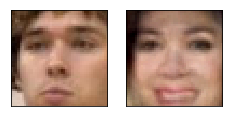

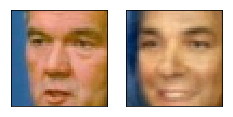

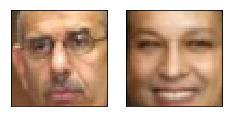

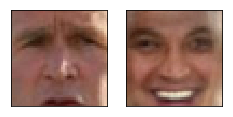

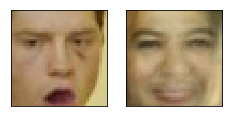

In [ ]:
make_me_smile(no_smile_ids)

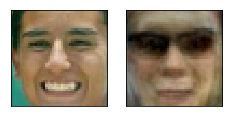

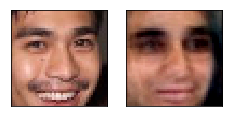

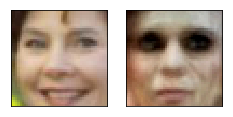

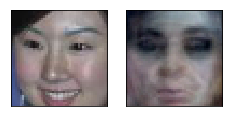

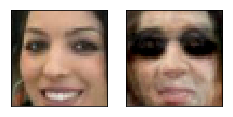

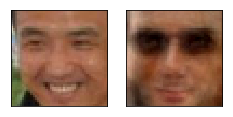

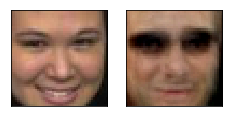

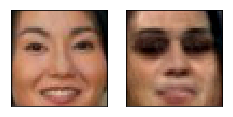

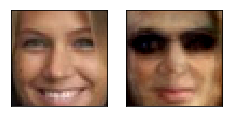

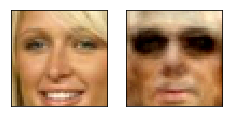

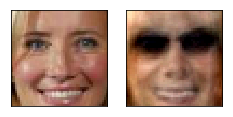

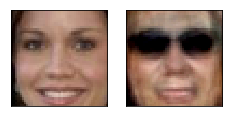

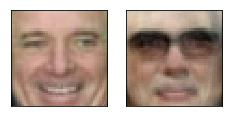

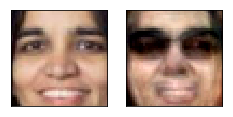

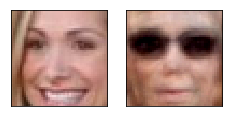

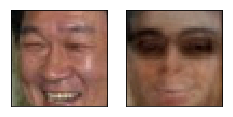

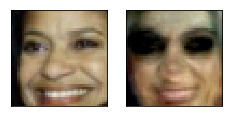

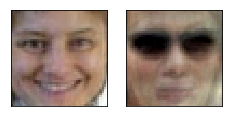

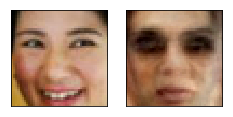

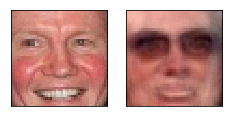

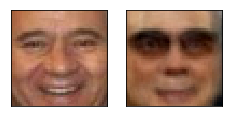

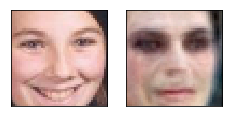

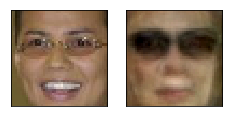

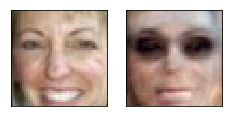

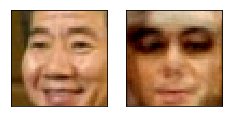

In [ ]:
give_me_sunglasses(smile_ids)

While the concept is pretty straightforward the simple autoencoder have some disadvantages. Let's explore them and try to do better.

# Variational autoencoder

So far we have trained our encoder to reconstruct the very same image that we've transfered to latent space. That means that when we're trying to **generate** new image from the point decoder never met we're getting _the best image it can produce_, but the quelity is not good enough.

> **In other words the encoded vectors may not be continuous in the latent space.**

In other hand Variational Autoencoders makes not only one encoded vector but **two**:
- vector of means, μ;
- vector of standard deviations, σ.

![https://miro.medium.com/max/657/1*CiVcrrPmpcB1YGMkTF7hzA.png](https://miro.medium.com/max/657/1*CiVcrrPmpcB1YGMkTF7hzA.png)

> picture from https://towardsdatascience.com/intuitively-understanding-variational-autoencoders-1bfe67eb5daf



In [ ]:
dim_z = 256

In [ ]:
class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()
        self.fc1 = nn.Linear(45*45*3, 1500)
        self.fc21 = nn.Linear(1500, dim_z)
        self.fc22 = nn.Linear(1500, dim_z)
        self.fc3 = nn.Linear(dim_z, 1500)
        self.fc4 = nn.Linear(1500, 45*45*3)
        self.relu = nn.LeakyReLU()

    def encode(self, x):
        x = self.relu(self.fc1(x))
        return self.fc21(x), self.fc22(x)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 *logvar)
        eps = torch.randn_like(std)
        return eps.mul(std).add_(mu)

    def decode(self, z):
        z = self.relu(self.fc3(z)) #1500
        return torch.sigmoid(self.fc4(z))

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        z = self.decode(z)
        return z, mu, logvar

def loss_vae_fn(x, recon_x, mu, logvar):
    BCE = F.binary_cross_entropy(recon_x, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

In [ ]:
model_vae = VAE().to(DEVICE)

In [ ]:
def fit_epoch_vae(model, train_x, optimizer, batch_size, is_cnn=False):
    running_loss = 0.0
    processed_data = 0

    for inputs in get_batch(train_x,batch_size):
        inputs = inputs.view(-1, 45*45*3)
        inputs = inputs.to(DEVICE)
        optimizer.zero_grad()

        decoded,mu,logvar, = model(inputs)
        outputs = decoded.view(-1, 45*45*3)
        outputs = outputs.to(DEVICE)

        loss = loss_vae_fn(inputs,outputs,mu,logvar)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.shape[0]
        processed_data += inputs.shape[0]

    train_loss = running_loss / processed_data
    return train_loss

def eval_epoch_vae(model, x_val, batch_size):
    running_loss = 0.0
    processed_data = 0
    model.eval()

    for inputs in get_batch(x_val,batch_size=batch_size):
        inputs = inputs.view(-1, 45*45*3)
        inputs = inputs.to(DEVICE)

        with torch.set_grad_enabled(False):
            decoded,mu,logvar = model(inputs)
            outputs = decoded.view(-1, 45*45*3)
            loss = loss_vae_fn(inputs,outputs,mu,logvar)
            running_loss += loss.item() * inputs.shape[0]
            processed_data += inputs.shape[0]

    val_loss = running_loss / processed_data

    #draw
    with torch.set_grad_enabled(False):
        pic = x_val[3]
        pic_input = pic.view(-1, 45*45*3)
        pic_input = pic_input.to(DEVICE)
        decoded,mu,logvar = model(inputs)
        pic_output = decoded[0].view(-1, 45*45*3).squeeze()
        pic_output = pic_output.to("cpu")
        pic_input = pic_input.to("cpu")
        plot_gallery([pic_input, pic_output],45,45,1,2)

    return val_loss

def train_vae(train_x, val_x, model, epochs=10, batch_size=32, lr=0.001):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    history = []
    log_template = "\nEpoch {ep:03d} train_loss: {t_loss:0.4f} val_loss: {val_loss:0.4f}"

    with tqdm(desc="epoch", total=epochs) as pbar_outer:
        for epoch in range(epochs):
            train_loss = fit_epoch_vae(model,train_x,optimizer,batch_size)
            val_loss = eval_epoch_vae(model,val_x,batch_size)
            print("loss: ", train_loss)

            history.append((train_loss,val_loss))

            pbar_outer.update(1)
            tqdm.write(log_template.format(ep=epoch+1, t_loss=train_loss, val_loss=val_loss))

    return history

epoch:   2%|▏         | 1/50 [00:01<00:56,  1.15s/it]

loss:  508412.2849073259

Epoch 001 train_loss: 508412.2849 val_loss: 494474.5675


epoch:   4%|▍         | 2/50 [00:02<00:54,  1.13s/it]

loss:  495570.6609163972

Epoch 002 train_loss: 495570.6609 val_loss: 488483.4042


epoch:   6%|▌         | 3/50 [00:03<00:52,  1.13s/it]

loss:  493081.2187083888

Epoch 003 train_loss: 493081.2187 val_loss: 489241.2294


epoch:   8%|▊         | 4/50 [00:04<00:51,  1.12s/it]

loss:  490978.6122164495

Epoch 004 train_loss: 490978.6122 val_loss: 485251.4288


epoch:  10%|█         | 5/50 [00:05<00:50,  1.11s/it]

loss:  489104.1548798031

Epoch 005 train_loss: 489104.1549 val_loss: 484154.4279


epoch:  12%|█▏        | 6/50 [00:06<00:49,  1.12s/it]

loss:  488594.8988283479

Epoch 006 train_loss: 488594.8988 val_loss: 483527.5268


epoch:  14%|█▍        | 7/50 [00:07<00:47,  1.11s/it]

loss:  487112.8448943076

Epoch 007 train_loss: 487112.8449 val_loss: 481756.6018


epoch:  16%|█▌        | 8/50 [00:08<00:46,  1.11s/it]

loss:  486245.4896373288

Epoch 008 train_loss: 486245.4896 val_loss: 483158.9969


epoch:  18%|█▊        | 9/50 [00:10<00:45,  1.11s/it]

loss:  486428.1236194003

Epoch 009 train_loss: 486428.1236 val_loss: 480497.7375


epoch:  20%|██        | 10/50 [00:11<00:44,  1.12s/it]

loss:  484721.05527600105

Epoch 010 train_loss: 484721.0553 val_loss: 480314.8486


epoch:  22%|██▏       | 11/50 [00:12<00:43,  1.12s/it]

loss:  485074.8947816602

Epoch 011 train_loss: 485074.8948 val_loss: 479241.6444


epoch:  24%|██▍       | 12/50 [00:13<00:42,  1.12s/it]

loss:  483821.4391005445

Epoch 012 train_loss: 483821.4391 val_loss: 479402.5478


epoch:  26%|██▌       | 13/50 [00:14<00:41,  1.12s/it]

loss:  483254.2622871885

Epoch 013 train_loss: 483254.2623 val_loss: 479377.0771


epoch:  28%|██▊       | 14/50 [00:15<00:40,  1.12s/it]

loss:  483356.3163133679

Epoch 014 train_loss: 483356.3163 val_loss: 479365.6525


epoch:  30%|███       | 15/50 [00:16<00:39,  1.12s/it]

loss:  482773.3542449353

Epoch 015 train_loss: 482773.3542 val_loss: 477864.6721


epoch:  32%|███▏      | 16/50 [00:17<00:38,  1.12s/it]

loss:  482241.94677186373

Epoch 016 train_loss: 482241.9468 val_loss: 478320.8058


epoch:  34%|███▍      | 17/50 [00:18<00:36,  1.12s/it]

loss:  483708.37640289136

Epoch 017 train_loss: 483708.3764 val_loss: 478230.4920


epoch:  36%|███▌      | 18/50 [00:20<00:35,  1.12s/it]

loss:  482327.7283339476

Epoch 018 train_loss: 482327.7283 val_loss: 482878.5468


epoch:  38%|███▊      | 19/50 [00:21<00:34,  1.12s/it]

loss:  482920.8042684159

Epoch 019 train_loss: 482920.8043 val_loss: 478260.6340


epoch:  40%|████      | 20/50 [00:22<00:33,  1.12s/it]

loss:  481489.2791114823

Epoch 020 train_loss: 481489.2791 val_loss: 476525.8940


epoch:  42%|████▏     | 21/50 [00:23<00:32,  1.12s/it]

loss:  481130.61286736734

Epoch 021 train_loss: 481130.6129 val_loss: 476943.5466


epoch:  44%|████▍     | 22/50 [00:24<00:31,  1.13s/it]

loss:  481772.2574632633

Epoch 022 train_loss: 481772.2575 val_loss: 476497.6258


epoch:  46%|████▌     | 23/50 [00:25<00:30,  1.13s/it]

loss:  480998.725635165

Epoch 023 train_loss: 480998.7256 val_loss: 476813.0543


epoch:  48%|████▊     | 24/50 [00:26<00:29,  1.13s/it]

loss:  480828.27948449686

Epoch 024 train_loss: 480828.2795 val_loss: 480207.9655


epoch:  50%|█████     | 25/50 [00:28<00:28,  1.13s/it]

loss:  480828.1896608094

Epoch 025 train_loss: 480828.1897 val_loss: 476457.3987


epoch:  52%|█████▏    | 26/50 [00:29<00:27,  1.13s/it]

loss:  480436.2617640765

Epoch 026 train_loss: 480436.2618 val_loss: 476546.7141


epoch:  54%|█████▍    | 27/50 [00:30<00:25,  1.13s/it]

loss:  480173.4661775371

Epoch 027 train_loss: 480173.4662 val_loss: 475142.4840


epoch:  56%|█████▌    | 28/50 [00:31<00:24,  1.12s/it]

loss:  479909.2680533099

Epoch 028 train_loss: 479909.2681 val_loss: 476706.2489


epoch:  58%|█████▊    | 29/50 [00:32<00:23,  1.12s/it]

loss:  480364.4919110828

Epoch 029 train_loss: 480364.4919 val_loss: 475527.0015


epoch:  60%|██████    | 30/50 [00:33<00:22,  1.12s/it]

loss:  479956.2393549672

Epoch 030 train_loss: 479956.2394 val_loss: 477083.9926


epoch:  62%|██████▏   | 31/50 [00:34<00:21,  1.12s/it]

loss:  480220.07597013505

Epoch 031 train_loss: 480220.0760 val_loss: 475468.6876


epoch:  64%|██████▍   | 32/50 [00:35<00:20,  1.12s/it]

loss:  479653.841372218

Epoch 032 train_loss: 479653.8414 val_loss: 474966.3025


epoch:  66%|██████▌   | 33/50 [00:36<00:19,  1.12s/it]

loss:  479380.54649009655

Epoch 033 train_loss: 479380.5465 val_loss: 475013.8102


epoch:  68%|██████▊   | 34/50 [00:38<00:17,  1.12s/it]

loss:  479200.1738500452

Epoch 034 train_loss: 479200.1739 val_loss: 477631.1088


epoch:  70%|███████   | 35/50 [00:39<00:17,  1.15s/it]

loss:  479794.60693777347

Epoch 035 train_loss: 479794.6069 val_loss: 475532.0587


epoch:  72%|███████▏  | 36/50 [00:40<00:15,  1.14s/it]

loss:  479862.66575518355

Epoch 036 train_loss: 479862.6658 val_loss: 475010.4883


epoch:  74%|███████▍  | 37/50 [00:41<00:14,  1.13s/it]

loss:  479254.23723131063

Epoch 037 train_loss: 479254.2372 val_loss: 474702.2555


epoch:  76%|███████▌  | 38/50 [00:42<00:13,  1.12s/it]

loss:  479147.11122669774

Epoch 038 train_loss: 479147.1112 val_loss: 474336.6106


epoch:  78%|███████▊  | 39/50 [00:43<00:12,  1.12s/it]

loss:  478847.1069065651

Epoch 039 train_loss: 478847.1069 val_loss: 474767.1579


epoch:  80%|████████  | 40/50 [00:44<00:11,  1.12s/it]

loss:  479346.512006313

Epoch 040 train_loss: 479346.5120 val_loss: 474539.5136


epoch:  82%|████████▏ | 41/50 [00:45<00:10,  1.12s/it]

loss:  479373.88515758753

Epoch 041 train_loss: 479373.8852 val_loss: 474411.3589


epoch:  84%|████████▍ | 42/50 [00:47<00:08,  1.11s/it]

loss:  478847.45516543416

Epoch 042 train_loss: 478847.4552 val_loss: 474025.8643


epoch:  86%|████████▌ | 43/50 [00:48<00:07,  1.11s/it]

loss:  478517.4446764433

Epoch 043 train_loss: 478517.4447 val_loss: 474506.2631


epoch:  88%|████████▊ | 44/50 [00:49<00:06,  1.11s/it]

loss:  478582.74229747243

Epoch 044 train_loss: 478582.7423 val_loss: 474304.0650


epoch:  90%|█████████ | 45/50 [00:50<00:05,  1.11s/it]

loss:  478503.12051045033

Epoch 045 train_loss: 478503.1205 val_loss: 474340.3260


epoch:  92%|█████████▏| 46/50 [00:51<00:04,  1.11s/it]

loss:  478490.10453026916

Epoch 046 train_loss: 478490.1045 val_loss: 474047.6133


epoch:  94%|█████████▍| 47/50 [00:52<00:03,  1.11s/it]

loss:  479401.45660250616

Epoch 047 train_loss: 479401.4566 val_loss: 474943.3725


epoch:  96%|█████████▌| 48/50 [00:53<00:02,  1.11s/it]

loss:  478620.895288425

Epoch 048 train_loss: 478620.8953 val_loss: 473750.2804


epoch:  98%|█████████▊| 49/50 [00:54<00:01,  1.11s/it]

loss:  478416.6311718304

Epoch 049 train_loss: 478416.6312 val_loss: 473973.9078


epoch: 100%|██████████| 50/50 [00:55<00:00,  1.12s/it]

loss:  478252.1273406292

Epoch 050 train_loss: 478252.1273 val_loss: 475934.5519


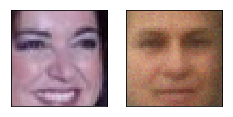

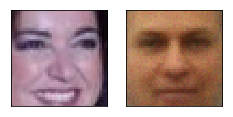

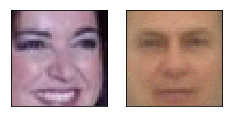

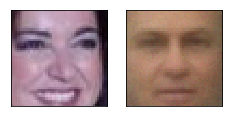

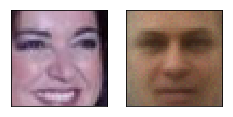

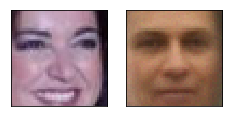

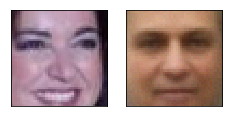

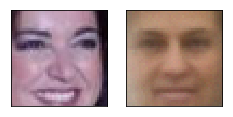

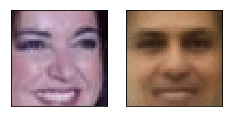

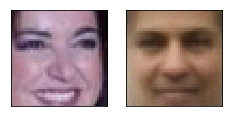

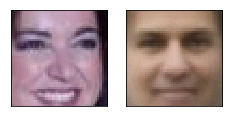

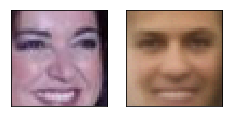

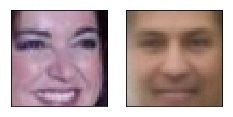

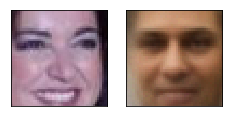

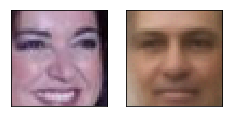

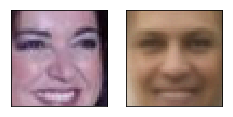

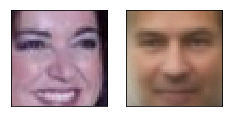

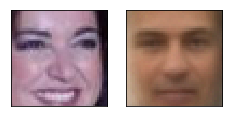

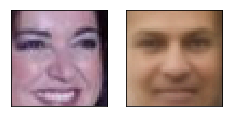

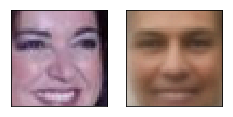

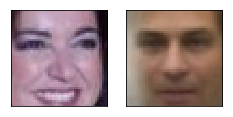

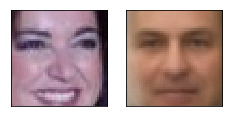

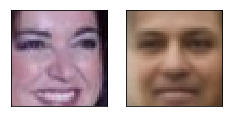

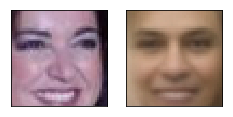

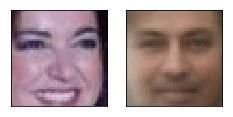

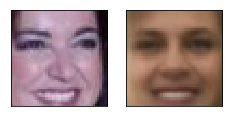

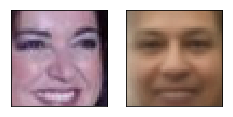

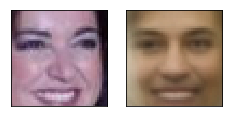

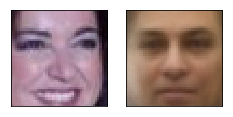

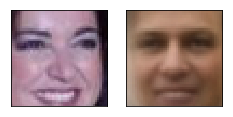

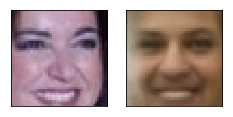

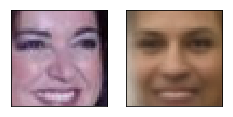

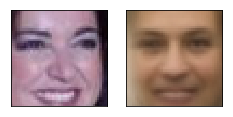

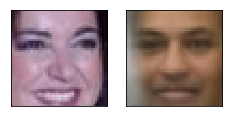

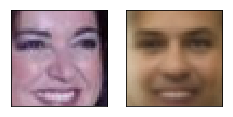

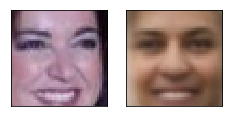

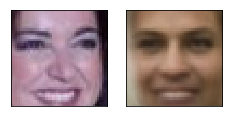

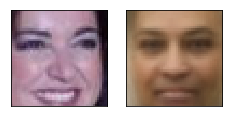

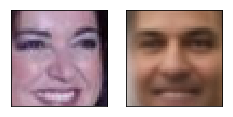

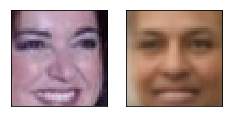

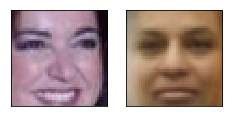

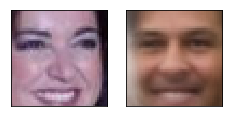

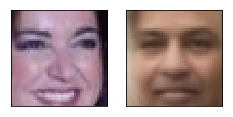

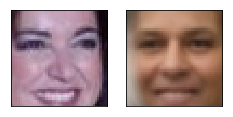

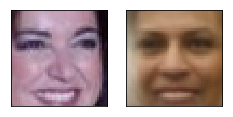

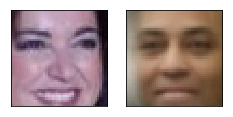

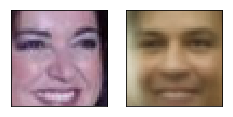

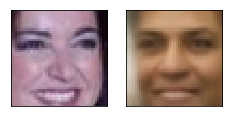

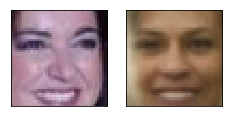

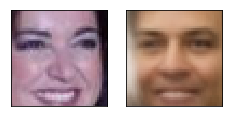

In [ ]:
history_vae = train_vae(X_train, X_val, model_vae, epochs=50, batch_size=128, lr=0.001)

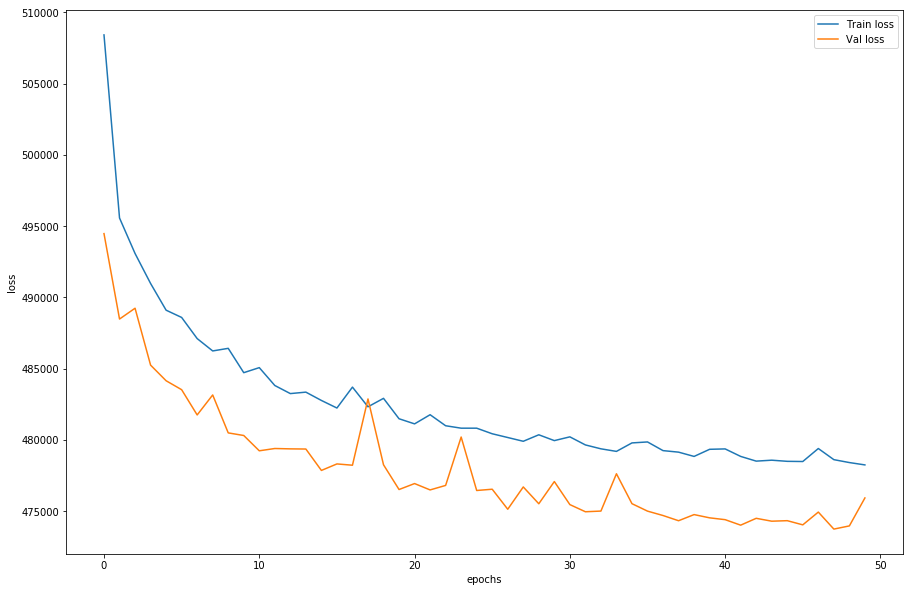

In [ ]:
train_loss, val_loss = zip(*history_vae)
plt.figure(figsize=(15,10))
plt.plot(train_loss, label='Train loss')
plt.plot(val_loss, label='Val loss')
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot();

# Conclusion

Variational autoencoders are cool. Although models in this particular notebook are simple they let us design complex generative models of data, and fit them to large datasets. They can generate images of fictional celebrity faces and high-resolution digital artwork.
These models also yield state-of-the-art machine learning results in image generation and reinforcement learning. Variational autoencoders (VAEs) were defined in 2013 by Kingma et al. and Rezende et al.